## HW Methodology - At a glance solution environments.

In Code
- Question #2


By Hand
- Question #4 (????)


Either
- Question #1
- Question #3


No Idea
- Question #5

# Question #1 - Naive Bayes & MLE

### Question 1.1 Answer: 4/10 = .40
### Question 1.2.1 Answer: .66
### Question 1.2.2 Answer: .25
### Question 1.3.1 Answer: TBD
### Question 1.3.2 Answer: TBD
### Question 1.4.1 Answer: TBD
### Question 1.4.2 Answer: TBD

# Question #2 - PGMs

Question 2.1, Part A: $p(A, B, C, D, E) = p(A)p(B|A)p(C|A)p(D|B)p(E|B,D)$

Question 2.1, Part B: $p(A, B, C, D, E) = p(A)p(B)p(C|A,B)p(D|B,C)p(E)$

Question 2.2: 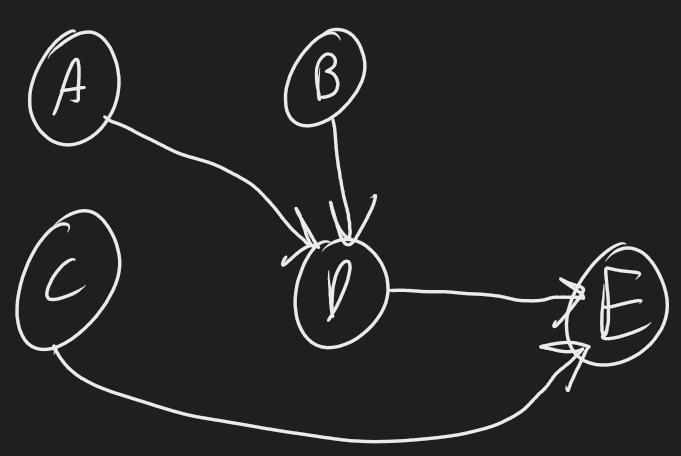

Question 2.3.1: $p(B=b) = p(B=b, A=a) + p(B=b, A=\neg a) = p(B=b|A=a)p(A=a) + p(B=b, A=\neg a)p(A=\neg a) = (0.5*0.8)+(0.3*0.2) = 0.54$

Question 2.3.2: $p(C=\neg c) = p(C=\neg c, B=b) + p(C=\neg c, B=\neg b) = p(C=\neg c | B=b)p(B=b) + p(C=\neg c | B=\neg b)p(B=\neg b) = (0.5*0.54) + (0.9*0.46) = 0.68$

Question 2.3.3: $p(A=a, C=\neg c) = p(A=a,B=b,C=\neg c) + p(A=a,B=\neg b,C=\neg c) = p(a)p(\neg c|b)p(b|a) + p(a)p(\neg c|\neg b)p(\neg b|a) = (0.8*0.5*0.6)+(0.8*0.9*0.4) = 0.53$

Question 2.3.4: $p(A=a, C=\neg c) = 0.53, p(A=a)p(C=\neg c) = 0.8*0.68 = 0.54$ - No!

Question 2.3.5: $p(A=a|B=b) = p(A\land B)\div p(B) = (p(A)*p(B|A))\div p(B) = 0.89$

Question 2.3.6: $p(A=a, C=\neg c|B=b) = 0.5$

Question 2.3.7: $p(A=a, C=\neg c|B=b) = 0.5, p(A=a|B=b)p(C=\neg c| B=b) = 0.89*0.5 = 0.45$ - No!

Question 2.3.8: $p(A=a|C=\neg c) = 0.8$

# Question #3 - Conditional Independence
[Lecture Link](https://osu.zoom.us/rec/share/p-FrPbNeLtFRS-ADFUwsW4adT_gdKx5lnuk2RBPHnbYiVJDesJ2yaeSQfMPs_f28.xg_W3Af9YIliprAA)

Part 1: Yes; No direct paths linking A to E

Part 2: Yes; Can reach B from A or C

Part 3: No; Rule 3 of Bayes Balls

Part 4: No: Can reach A from E 

Part 5: No; Rule 4 of Bayes Balls

# Question #4 - KMeans

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
import warnings
warnings.filterwarnings("ignore")

dataset = np.array([12, 14, 16, 18, 32, 34, 36, 38])
dataset

array([12, 14, 16, 18, 32, 34, 36, 38])

In [2]:
cluster_init = np.array([[20], [50]])
kmeans_1 = KMeans(n_clusters=2, max_iter=10, init=cluster_init).fit(dataset.reshape(-1, 1))
kmeans_1.cluster_centers_

array([[15.],
       [35.]])

In [3]:
cluster_init = np.array([[20], [60]])
kmeans_1 = KMeans(n_clusters=2, max_iter=10, init=cluster_init).fit(dataset.reshape(-1, 1))
kmeans_1.cluster_centers_

array([[15.],
       [35.]])

# Question #5 - Gaussian Mixture Models
inspired by https://gryslik.github.io/osu_cse3521_spring2022/course_materials/lecture_examples/EM_Algorithm.ipynb

In [4]:
import numpy as np
from scipy.stats import binom
import math

params = {
    'mew_1': 4,
    'sigma_1': 4,
    'mew_2': 10,
    'sigma_2': 4,
    'lambda': 0.5
}
observations = np.array([0, 2, 10, 12, 14, 16])

In [5]:
# E-Step.
prob_X_given_y_equals_1 = np.array([(1/((params['sigma_1'] * math.sqrt(2*math.pi)))) * math.exp(-(math.pow(x-params['mew_1'], 2) / (2 * math.pow(params['sigma_1'], 2)))) for x in observations])
prob_X_given_y_equals_2 = np.array([(1/((params['sigma_2'] * math.sqrt(2*math.pi)))) * math.exp(-(math.pow(x-params['mew_2'], 2) / (2 * math.pow(params['sigma_2'], 2)))) for x in observations])
print(prob_X_given_y_equals_1)
print(prob_X_given_y_equals_2)

gmm_dist = 0.5*prob_X_given_y_equals_1 + 1*prob_X_given_y_equals_2
print("GMM Dist:", gmm_dist)

[0.06049268 0.08801633 0.0323794  0.01349774 0.00438208 0.00110796]
[0.00438208 0.01349774 0.09973557 0.08801633 0.06049268 0.0323794 ]
GMM Dist: [0.03462842 0.05750591 0.11592527 0.0947652  0.06268372 0.03293338]


In [6]:
for i in range(6):
    x_i = observations[i]
    prob_Y_equals_2 = 1
    numerator = 0.5 * prob_X_given_y_equals_1[i]
    denom = numerator + 1*prob_X_given_y_equals_2[i]
    result = np.around(numerator/denom, 3)
    print("Probability for Data Point #" + str(i+1) + ":", result)

Probability for Data Point #1: 0.873
Probability for Data Point #2: 0.765
Probability for Data Point #3: 0.14
Probability for Data Point #4: 0.071
Probability for Data Point #5: 0.035
Probability for Data Point #6: 0.017
